In [5]:
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt

In [6]:
#Define the functions that build and train a model
def build_model(my_learning_rate):

    # Most simple tf.keras models are sequential.
    # A sequential model contains one or more layers.
    model = tf.keras.models.Sequential()
    # Describe the topography of the model.
    # The topography of a simple linear regression model
    # is a single node in a single layer.
    model.add(tf.keras.layers.Dense(units=1,
    input_shape=(1,)))
    # Compile the model topography into code that
    # TensorFlow can efficiently execute. Configure
    # training to minimize the model's mean squared error.
    model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model

def train_model(model, feature, label, epochs, batch_size):
    """Train the model by feeding it data."""
    # Feed the feature values and the label values to the
    # model. The model will train for the specified number
    # of epochs, gradually learning how the feature values
    # relate to the label values.
    history = model.fit(x=feature,
    y=label,
    batch_size=batch_size,
    epochs=epochs)  
    # Gather the trained model's weight and bias.
    trained_weight = model.get_weights()[0]
    trained_bias = model.get_weights()[1]
    # The list of epochs is stored separately from the
    # rest of history.
    epochs = history.epoch
    # Gather the history (a snapshot) of each epoch.
    hist = pd.DataFrame(history.history)
    # Specifically gather the model's root mean
    #squared error at each epoch.
    rmse = hist["root_mean_squared_error"]
    return trained_weight, trained_bias, epochs, rmse
print("Defined create_model and train_model")


Defined create_model and train_model


In [7]:
#Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
    """Plot the trained model against the training feature and label."""
    # Label the axes.
    plt.xlabel("feature")
    plt.ylabel("label")
    # Plot the feature values vs. label values.
    plt.scatter(feature, label)
    # Create a red line representing the model. The red line starts
    # at coordinates (x0, y0) and ends at coordinates (x1, y1).
    x0 = 0
    y0 = trained_bias
    x1 = my_feature[-1]
    y1 = trained_bias + (trained_weight * x1)
    plt.plot([x0, x1], [y0, y1], c='r')
    # Render the scatter plot and the red line.
    plt.show()
    return
def plot_the_loss_curve(epochs, rmse):
    """Plot the loss curve, which shows loss vs. epoch"""
    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Root Mean Squared Error")
    plt.plot(epochs, rmse, label="Loss")
    plt.legend()
    plt.ylim([rmse.min()*0.97, rmse.max()])
    plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


Epoch 1/10


C:\Users\Justin\AppData\Roaming\Python\Python39\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 309ms/step - loss: 1297.2310 - root_mean_squared_error: 36.0171
Epoch 2/10
1/1 [==============================] - 0s 3ms/step - loss: 1278.5059 - root_mean_squared_error: 35.7562
Epoch 3/10
1/1 [==============================] - 0s 4ms/step - loss: 1265.0531 - root_mean_squared_error: 35.5676
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 1253.8669 - root_mean_squared_error: 35.4100
Epoch 5/10
1/1 [==============================] - 0s 4ms/step - loss: 1243.9940 - root_mean_squared_error: 35.2703
Epoch 6/10
1/1 [==============================] - 0s 3ms/step - loss: 1234.9923 - root_mean_squared_error: 35.1425
Epoch 7/10
1/1 [==============================] - 0s 6ms/step - loss: 1226.6156 - root_mean_squared_error: 35.0231
Epoch 8/10
1/1 [==============================] - 0s 4ms/step - loss: 1218.7111 - root_mean_squared_error: 34.9100
Epoch 9/10
1/1 [==============================] - 0s 4ms/step - loss: 1211.1760 - root_me

C:\Python39\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


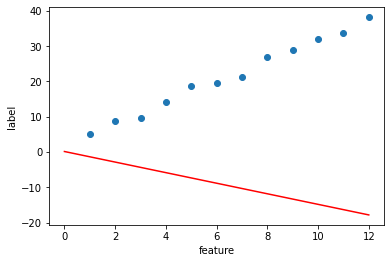

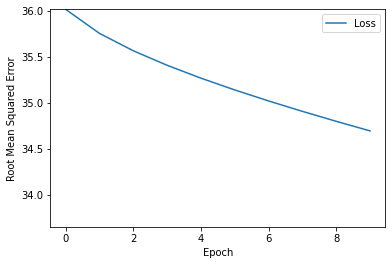

In [8]:
my_feature = ([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0])
my_label = ([5.0, 8.8, 9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])
learning_rate=0.01
epochs=10
my_batch_size=12
my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature,
my_label, epochs,
my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)
